In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ObjectiveFunction import ObjectiveFunction
from BO import BayesianOptimizer

Ackley:

In [2]:
obj = ObjectiveFunction("Ackley", dim=2)
search_space = obj.create_input_space()
response = obj.generate_true_response(search_space)
kappa = 3

opt = BayesianOptimizer(search_space, response)
regret_gpbo, baseline = opt.train(
    kappa,
    initial_points=1,
    repetitions=30,
    iterations=150,
    training_iter=10,
    strategy="Vanilla BO",
)
baseline, _ = baseline

regret_mpbo, _ = opt.train(
    kappa,
    repetitions=30,
    iterations=150,
    training_iter=10,
    strategy="MP-BO",
    begin_strat=20,
    initial_points=20,
    follow_baseline=baseline,
)

100%|██████████| 30/30 [00:55<00:00,  1.86s/it]


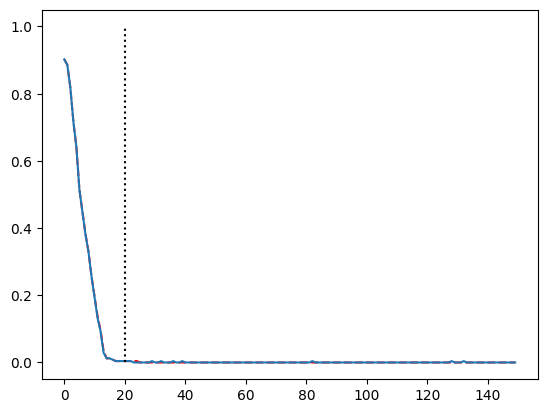

In [3]:
plt.plot(regret_gpbo.mean(axis=0), label="Vanilla BO", color="red", linestyle="--")
plt.plot(regret_mpbo.mean(axis=0), label="MP-BO", color="tab:blue")
plt.vlines(20, 0, 1, linestyle="dotted", color="k")

Michalewicz 2D:

In [15]:
obj = ObjectiveFunction("Michalewicz", dim=2)
search_space = obj.create_input_space()
response = obj.generate_true_response(search_space)
kappa = 4

opt = BayesianOptimizer(search_space, response)
regret_gpbo, baseline = opt.train(
    kappa,
    initial_points=1,
    repetitions=30,
    iterations=150,
    training_iter=10,
    strategy="Vanilla BO",
)

regret_mpbo, _ = opt.train(
    kappa,
    repetitions=30,
    iterations=150,
    training_iter=10,
    strategy="MP-BO",
    begin_strat=20,
    initial_points=20,
    follow_baseline=baseline,
)

100%|██████████| 30/30 [00:54<00:00,  1.81s/it]


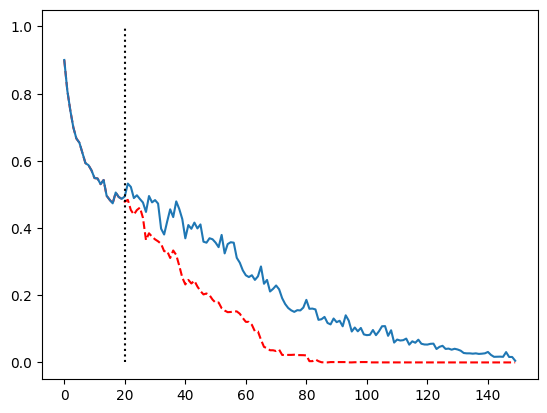

In [16]:
plt.plot(regret_gpbo.mean(axis=0), label="Vanilla BO", color="red", linestyle="--")
plt.plot(regret_mpbo.mean(axis=0), label="MP-BO", color="tab:blue")
plt.vlines(20, 0, 1, linestyle="dotted", color="k")

Michalewicz 4D:

In [17]:
obj = ObjectiveFunction("Michalewicz", dim=4)
search_space = obj.create_input_space()
response = obj.generate_true_response(search_space)
kappa = 5

opt = BayesianOptimizer(search_space, response)
regret_gpbo, baseline = opt.train(
    kappa,
    initial_points=1,
    repetitions=30,
    iterations=150,
    training_iter=10,
    strategy="Vanilla BO",
    begin_strat=20,
    up=None,
    low=None,
    follow_baseline=None,
    return_exploit=False,
)

regret_mpbo, _ = opt.train(
    kappa,
    repetitions=30,
    iterations=150,
    training_iter=10,
    strategy="MP-BO",
    begin_strat=20,
    initial_points=20,
    follow_baseline=baseline,
)

100%|██████████| 30/30 [01:02<00:00,  2.08s/it]


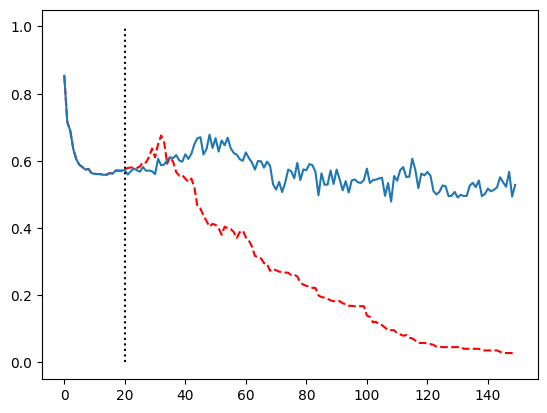

In [18]:
plt.plot(regret_gpbo.mean(axis=0), label="Vanilla BO", color="red", linestyle="--")
plt.plot(regret_mpbo.mean(axis=0), label="MP-BO", color="tab:blue")
plt.vlines(20, 0, 1, linestyle="dotted", color="k")

Hartmann:

In [20]:
obj = ObjectiveFunction("Hartmann", dim=6)
search_space = obj.create_input_space()
response = obj.generate_true_response(search_space)
kappa = 5

opt = BayesianOptimizer(search_space, response)
regret_gpbo, baseline = opt.train(
    kappa,
    initial_points=1,
    repetitions=30,
    iterations=150,
    training_iter=10,
    strategy="Vanilla BO",
    begin_strat=20,
    up=None,
    low=None,
    follow_baseline=None,
    return_exploit=False,
)

regret_mpbo, _ = opt.train(
    kappa,
    repetitions=30,
    iterations=150,
    training_iter=10,
    strategy="MP-BO",
    begin_strat=20,
    initial_points=20,
    follow_baseline=baseline,
)

100%|██████████| 30/30 [01:26<00:00,  2.89s/it]


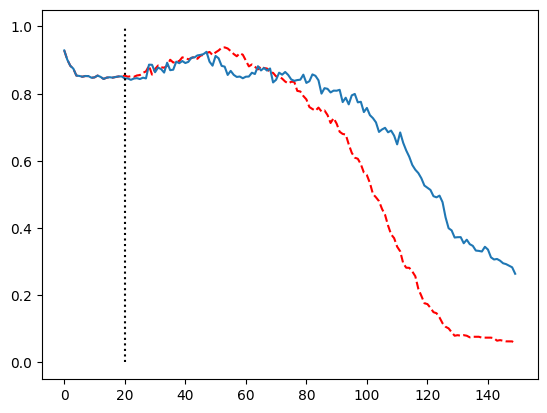

In [21]:
plt.plot(regret_gpbo.mean(axis=0), label="Vanilla BO", color="red", linestyle="--")
plt.plot(regret_mpbo.mean(axis=0), label="MP-BO", color="tab:blue")
plt.vlines(20, 0, 1, linestyle="dotted", color="k")

In [6]:
obj = ObjectiveFunction("Ackley", dim=2)
search_space = obj.create_input_space()
response = obj.generate_true_response(search_space)
kappa = 3

opt = BayesianOptimizer(search_space, response, noise_std=0.1)
regret_gpbo, baseline = opt.train(
    kappa,
    initial_points=1,
    repetitions=10,
    iterations=300,
    training_iter=10,
    strategy="Vanilla BO",
    save_file=True,
    file_name="Ackley_bo_3_10_300",
)

baseline, _ = baseline

regret_mpbo, _ = opt.train(
    kappa,
    repetitions=10,
    iterations=800,
    training_iter=10,
    strategy="MP-BO",
    begin_strat=20,
    initial_points=20,
    follow_baseline=baseline,
    save_file=True,
    file_name="Ackley_mpbo_3_10_800",
)

100%|██████████| 10/10 [01:40<00:00, 10.06s/it]


300 800


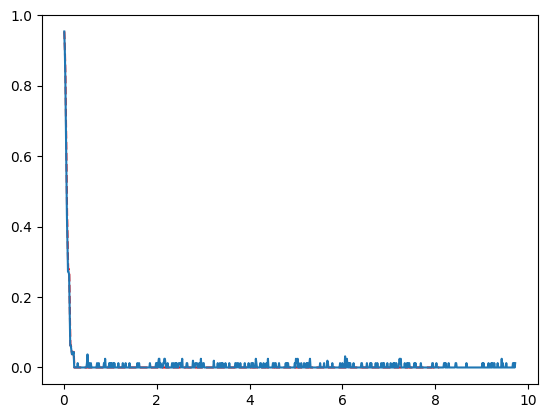

In [7]:
gpbo = np.load("Ackley_bo_3_10_300.npz")
mpbo = np.load("Ackley_mpbo_3_10_800.npz")

time_gpbo = np.cumsum(gpbo["time"].mean(axis=0))
# time_gpbo = time_gpbo[time_gpbo < 1.5]
time_mpbo = np.cumsum(mpbo["time"].mean(axis=0))
# time_mpbo = time_mpbo[time_mpbo < 1.5]

regret_gpbo = gpbo["regret"].mean(axis=0)[: len(time_gpbo)]
regret_mpbo = mpbo["regret"].mean(axis=0)[: len(time_mpbo)]


plt.plot(time_gpbo, regret_gpbo, "r", linestyle="--", label="Vanilla BO")
plt.plot(time_mpbo, regret_mpbo, "tab:blue", label="MP-BO")

print(len(time_gpbo), len(time_mpbo))

In [10]:
obj = ObjectiveFunction("Michalewicz", dim=2)
search_space = obj.create_input_space()
response = obj.generate_true_response(search_space)
kappa = 4

opt = BayesianOptimizer(search_space, response, noise_std=0.1)
regret_gpbo, baseline = opt.train(
    kappa,
    initial_points=1,
    repetitions=10,
    iterations=300,
    training_iter=10,
    strategy="Vanilla BO",
    save_file=True,
    file_name="Mich2D_bo_4_10_300",
)

baseline, _ = baseline

regret_mpbo, _ = opt.train(
    kappa,
    repetitions=10,
    iterations=800,
    training_iter=10,
    strategy="MP-BO",
    begin_strat=20,
    initial_points=20,
    follow_baseline=baseline,
    save_file=True,
    file_name="Mich2D_mpbo_4_10_800",
)

100%|██████████| 10/10 [02:08<00:00, 12.84s/it]


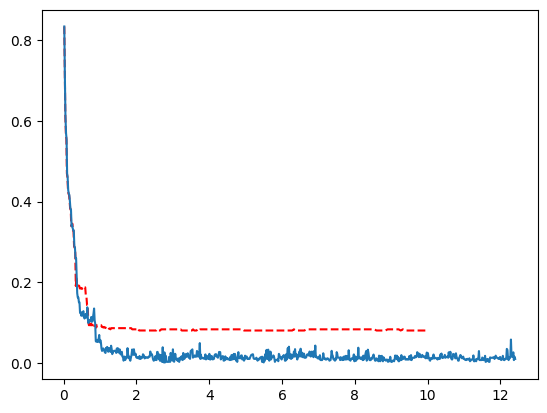

300 800


In [11]:
gpbo = np.load("Mich2D_bo_4_10_300.npz")
mpbo = np.load("Mich2D_mpbo_4_10_800.npz")

time_gpbo = np.cumsum(gpbo["time"].mean(axis=0))
# time_gpbo = time_gpbo[time_gpbo < 8]
time_mpbo = np.cumsum(mpbo["time"].mean(axis=0))
# time_mpbo = time_mpbo[time_mpbo < 8]

regret_gpbo = gpbo["regret"].mean(axis=0)[: len(time_gpbo)]
regret_mpbo = mpbo["regret"].mean(axis=0)[: len(time_mpbo)]


plt.plot(time_gpbo, regret_gpbo, "r", linestyle="--", label="Vanilla BO")
plt.plot(time_mpbo, regret_mpbo, "tab:blue", label="MP-BO")
plt.show()
print(len(time_gpbo), len(time_mpbo))

In [31]:
obj = ObjectiveFunction("Michalewicz", dim=4)
search_space = obj.create_input_space()
response = obj.generate_true_response(search_space)
kappa = 5

opt = BayesianOptimizer(search_space, response, noise_std=0.1)
regret_gpbo, baseline = opt.train(
    kappa,
    initial_points=1,
    repetitions=10,
    iterations=300,
    training_iter=10,
    strategy="Vanilla BO",
    save_file=True,
    file_name="Mich4D_bo_4_10_300",
)

baseline, _ = baseline

regret_mpbo, _ = opt.train(
    kappa,
    repetitions=10,
    iterations=800,
    strategy="MP-BO",
    begin_strat=60,
    initial_points=60,
    follow_baseline=baseline,
    save_file=True,
    file_name="Mich4D_mpbo_4_10_800",
)

100%|██████████| 10/10 [02:36<00:00, 15.67s/it]


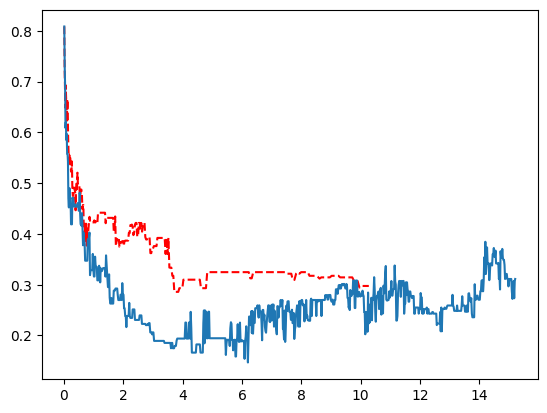

300 800


In [32]:
gpbo = np.load("Mich4D_bo_4_10_300.npz")
mpbo = np.load("Mich4D_mpbo_4_10_800.npz")

time_gpbo = np.cumsum(gpbo["time"].mean(axis=0))
# time_gpbo = time_gpbo[time_gpbo < 8]
time_mpbo = np.cumsum(mpbo["time"].mean(axis=0))
# time_mpbo = time_mpbo[time_mpbo < 8]

regret_gpbo = gpbo["regret"].mean(axis=0)[: len(time_gpbo)]
regret_mpbo = mpbo["regret"].mean(axis=0)[: len(time_mpbo)]


plt.plot(time_gpbo, regret_gpbo, "r", linestyle="--", label="Vanilla BO")
plt.plot(time_mpbo, regret_mpbo, "tab:blue", label="MP-BO")
plt.show()
print(len(time_gpbo), len(time_mpbo))

In [21]:
obj = ObjectiveFunction("Hartmann", dim=6)
search_space = obj.create_input_space()
response = obj.generate_true_response(search_space)
kappa = 5

opt = BayesianOptimizer(search_space, response, noise_std=0.1)
regret_gpbo, baseline = opt.train(
    kappa,
    initial_points=1,
    repetitions=10,
    iterations=300,
    training_iter=10,
    strategy="Vanilla BO",
    save_file=True,
    file_name="Hart_bo_4_10_300",
)

baseline, _ = baseline


regret_mpbo, _ = opt.train(
    kappa,
    repetitions=10,
    iterations=800,
    training_iter=10,
    strategy="MP-BO",
    begin_strat=60,
    initial_points=60,
    follow_baseline=baseline,
    save_file=True,
    file_name="Hart_mpbo_4_10_800",
)

100%|██████████| 10/10 [03:02<00:00, 18.20s/it]


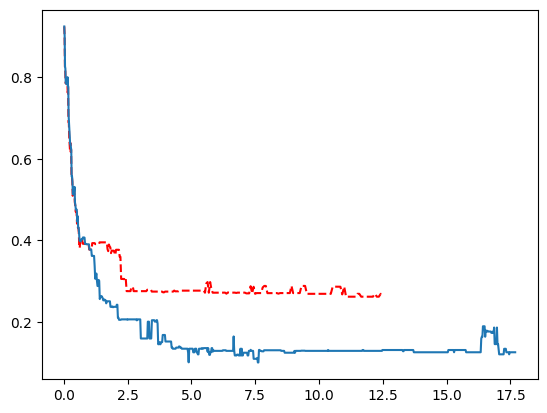

300 800


In [22]:
gpbo = np.load("Hart_bo_4_10_300.npz")
mpbo = np.load("Hart_mpbo_4_10_800.npz")

time_gpbo = np.cumsum(gpbo["time"].mean(axis=0))
# time_gpbo = time_gpbo[time_gpbo < 8]
time_mpbo = np.cumsum(mpbo["time"].mean(axis=0))
# time_mpbo = time_mpbo[time_mpbo < 8]

regret_gpbo = gpbo["regret"].mean(axis=0)[: len(time_gpbo)]
regret_mpbo = mpbo["regret"].mean(axis=0)[: len(time_mpbo)]


plt.plot(time_gpbo, regret_gpbo, "r", linestyle="--", label="Vanilla BO")
plt.plot(time_mpbo, regret_mpbo, "tab:blue", label="MP-BO")
plt.show()
print(len(time_gpbo), len(time_mpbo))